In [8]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
# from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
# from sklearn.metrics import r2_score  # For find accuracy with R2 Score
# from sklearn.metrics import mean_squared_error  # For MSE
# from math import sqrt  # For squareroot operation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [9]:
data = pd.read_csv(r'C:\Users\Hoang Phuong\OneDrive - University of Calgary\Win 2022 3rd year\Bmen 415\fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

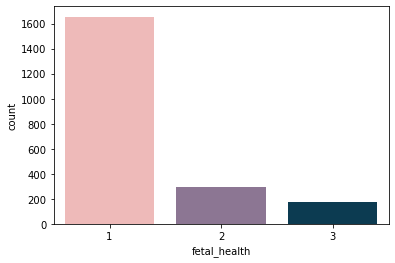

In [10]:
# distribution [Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)] of target label 'fetal_health'
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

In [11]:
X = data.drop(['fetal_health'], axis=1)
y = data["fetal_health"]
# Split the dataset into a training set (80%) and a test set (20%) using train_test_split() from sklearn library.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
train_size, num_features = X.shape
num_labels = 3

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,4.161509e-16,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-1.803982e-16,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.958452e-15,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-2.625683e-15,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.127706e-15,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,7.254767e-16,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,4.324961e-15,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,2.687304e-16,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,-2.481552e-16,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,2.291362e-15,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


In [12]:
from sklearn.linear_model import LogisticRegression

logisticregression= LogisticRegression(C=10, solver='lbfgs',multi_class='multinomial', max_iter=10000)
logisticregression.fit(X_train, y_train)

y_pred_logisticregression_test = logisticregression.predict(X_test)

accuracy_logisticregression_test = accuracy_score(y_test, y_pred_logisticregression_test)
print("Testing Accuracy for logistic regression Model: ", accuracy_logisticregression_test*100)

cf_matrix = confusion_matrix(y_test, y_pred_logisticregression_test)
print("Confusion matrix =",cf_matrix)

Testing Accuracy for logistic regression Model:  87.03007518796993
Confusion matrix = [[385  19   6]
 [ 31  39   2]
 [  3   8  39]]


G:\python\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.naive_bayes import GaussianNB

naiveBayes= GaussianNB()
naiveBayes.fit(X_train, y_train)

y_pred_naiveBayes_test = naiveBayes.predict(X_test)

accuracy_naiveBayes_test = accuracy_score(y_test, y_pred_naiveBayes_test)
print("Testing Accuracy for logistic regression Model: ", accuracy_naiveBayes_test*100)

cf_matrix = confusion_matrix(y_test, y_pred_naiveBayes_test)
print("Confusion matrix =",cf_matrix)

Testing Accuracy for logistic regression Model:  79.51127819548873
Confusion matrix = [[330  61  19]
 [ 10  59   3]
 [  2  14  34]]


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
tree.fit(X_train, y_train)

y_pred_tree_test = tree.predict(X_test)

accuracy_tree_test = accuracy_score(y_test, y_pred_tree_test)
print("Testing Accuracy for logistic regression Model: ", accuracy_tree_test*100)

cf_matrix = confusion_matrix(y_test, y_pred_tree_test)
print("Confusion matrix =",cf_matrix)

Testing Accuracy for logistic regression Model:  92.85714285714286
Confusion matrix = [[399  10   1]
 [ 17  51   4]
 [  3   3  44]]
